In [ ]:
#3 Decision Tree

In [32]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics 
from jcopml.pipeline import num_pipe, cat_pipe

In [33]:
col_names = ['Harga', 'Jarak', 'Transportasi', 'Buat_perumahan']

In [34]:
df = pd.read_csv("perumahan.txt")
df

,Harga,Jarak,Transportasi,Buat_perumahan
0,0,0,1,1
1,1,0,1,1
2,2,0,1,1
3,2,2,1,0
4,2,1,1,0
5,1,2,0,0
6,0,2,0,0
7,0,1,1,1
8,2,2,0,0
9,1,1,0,1


In [35]:
feature_cols = ['Harga', 'Jarak', 'Transportasi']
X = df[feature_cols]
y = df.Buat_perumahan

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [52]:
 print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[1 0]
 [1 1]]


In [53]:
print("Report : ", classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



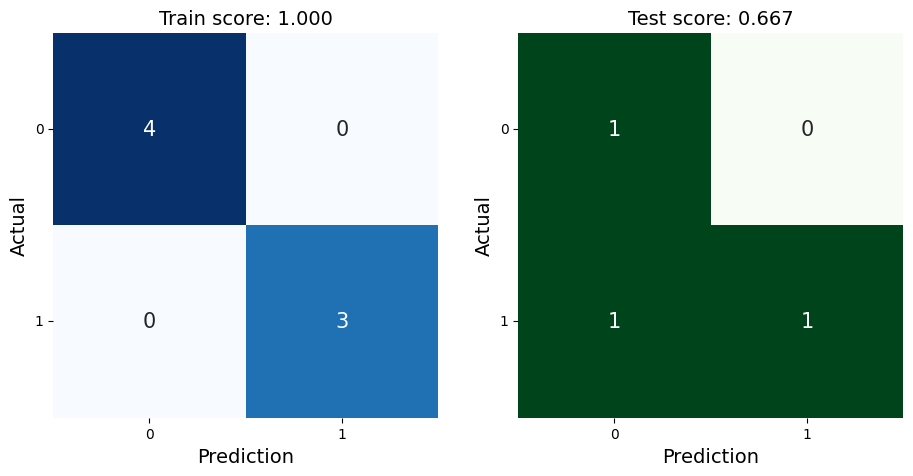

In [54]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)

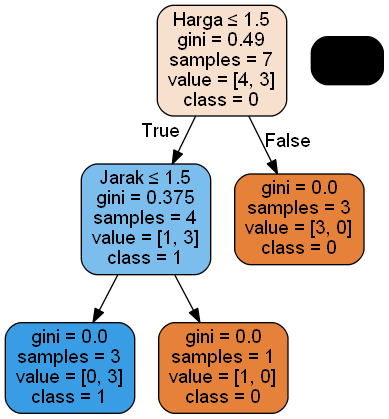

In [55]:
from sklearn.tree import export_graphviz
from io import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('perumahan.png')
Image(graph.create_png())